In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1、输出5*5矩阵

In [2]:
A = np.eye(5)
A

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### 2、根据城市人口数量，预测开小吃店的利润 数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。
* 2.1 Plotting the data

In [3]:
path = "./data/ex1data1.txt"
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


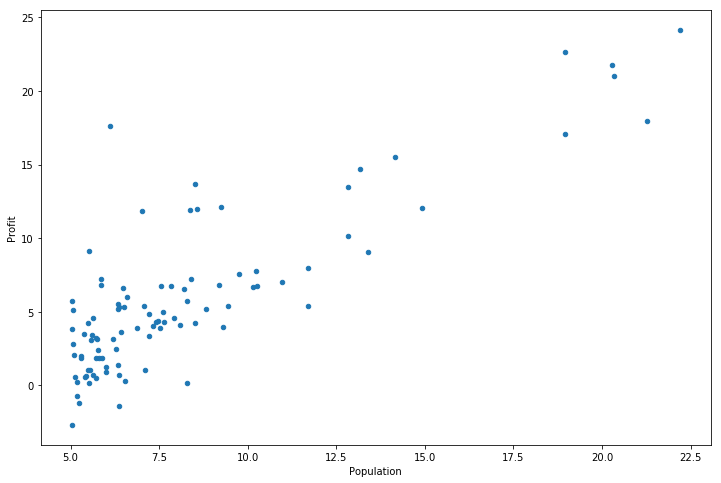

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
plt.show()